# Loneliness index and health and disability deprivation exploration

In [1]:
import pandas as pd

In [2]:
loneliness_imd = pd.read_csv('england/data_without_outliers.csv', index_col=0) # use index from dataset pre-outlier removal which was included in CSV
loneliness_imd.drop(6270, inplace=True)
imd = pd.read_csv('england/imd2015eng.csv')
full_loneliness = pd.read_csv('england/final_data.csv')

In [3]:
loneliness_imd

,lsoa11,year,loneills,lsoa_code,lsoa_name,district_code,district_name,imd_score,imd_rank,imd_decile,...,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
4,E01000017,2015,-0.972582,E01000017,Barking and Dagenham 009C,E09000002,Barking and Dagenham,40.563,4357.0,2.0,...,11830.0,4.0,0.525,8498.0,3.0,1622.0,409.0,991.0,222.0,957.00
5,E01000021,2015,-3.496225,E01000021,Barking and Dagenham 008A,E09000002,Barking and Dagenham,40.821,4273.0,2.0,...,3282.0,1.0,0.511,8670.0,3.0,1601.0,401.0,1021.0,179.0,1004.25
6,E01000025,2015,-0.555496,E01000025,Barking and Dagenham 008E,E09000002,Barking and Dagenham,35.995,5772.0,2.0,...,11134.0,4.0,0.574,7918.0,3.0,1602.0,385.0,1000.0,217.0,987.50
7,E01000027,2015,0.733600,E01000027,Barking and Dagenham 001A,E09000002,Barking and Dagenham,41.997,3924.0,2.0,...,16033.0,5.0,0.145,13786.0,5.0,1728.0,479.0,964.0,285.0,946.75
8,E01000031,2015,1.767929,E01000031,Barking and Dagenham 002A,E09000002,Barking and Dagenham,25.078,10820.0,4.0,...,13998.0,5.0,0.814,5475.0,2.0,1625.0,343.0,965.0,317.0,972.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6261,E01033732,2015,2.056518,E01033732,Greenwich 036D,E09000011,Greenwich,20.092,14168.0,5.0,...,22887.0,7.0,1.475,1610.0,1.0,1137.0,214.0,878.0,45.0,856.75
6262,E01033734,2015,1.001555,E01033734,Greenwich 004F,E09000011,Greenwich,17.934,15955.0,5.0,...,9636.0,3.0,0.576,7886.0,3.0,1356.0,272.0,1055.0,29.0,1052.00
6263,E01033737,2015,-0.539132,E01033737,Greenwich 004I,E09000011,Greenwich,39.669,4599.0,2.0,...,15037.0,5.0,1.300,2248.0,1.0,1475.0,378.0,953.0,144.0,933.00
6265,E01033746,2015,-0.780173,E01033746,Greenwich 038E,E09000011,Greenwich,22.292,12540.0,4.0,...,3239.0,1.0,1.394,1875.0,1.0,1460.0,212.0,916.0,332.0,929.25


In [4]:
for c in list(loneliness_imd.columns):
    print(c)

lsoa11
year
loneills
lsoa_code
lsoa_name
district_code
district_name
imd_score
imd_rank
imd_decile
income_score
income_rank
income_decile
employment_rate
employment_score
employment_decile
education_score
education_rank
education_decile
health_score
health_rank
health_decile
crime_score
crime_rank
crime_decile
housing_score
housing_rank
housing_decile
living_score
living_rank
living_decile
poor_children_score
poor_children_rank
poor_children_decile
poor_older_score
poor_older_rank
poor_older_decile
young_sub_score
young_sub_rank
young_sub_decile
adult_skills_sub_score
adult_skills_sub_rank
adult_skills_sub_decile
geog_barriers_sub_score
geog_barriers_sub_rank
geog_barriers_sub_decile
wider_barriers_sub_score
wider_barriers_sub_rank
wider_barriers_sub_decile
indoor_sub_score
indoor_sub_rank
indoor_sub_decile
outdoor_sub_score
outdoor_sub_rank
outdoor_sub_decile
total_population
aged_under_15_population
aged_16-59_population
aged_over_60_population
working_age_population


In [5]:
desired_columns = [
    'lsoa11', 'year', 'lsoa_code', 'lsoa_name', 'district_code', 'district_name',
    'loneills',
    'imd_score', 'imd_rank', 'imd_decile',
    'health_score', 'health_rank', 'health_decile',
    'aged_under_15_population', 'aged_16-59_population', 'aged_over_60_population', 'total_population'
]

loneliness_health = loneliness_imd.filter(desired_columns, axis=1)
print(loneliness_health.shape)

(4943, 17)


## Health score and loneliness index

In [6]:
import plotly.express as px

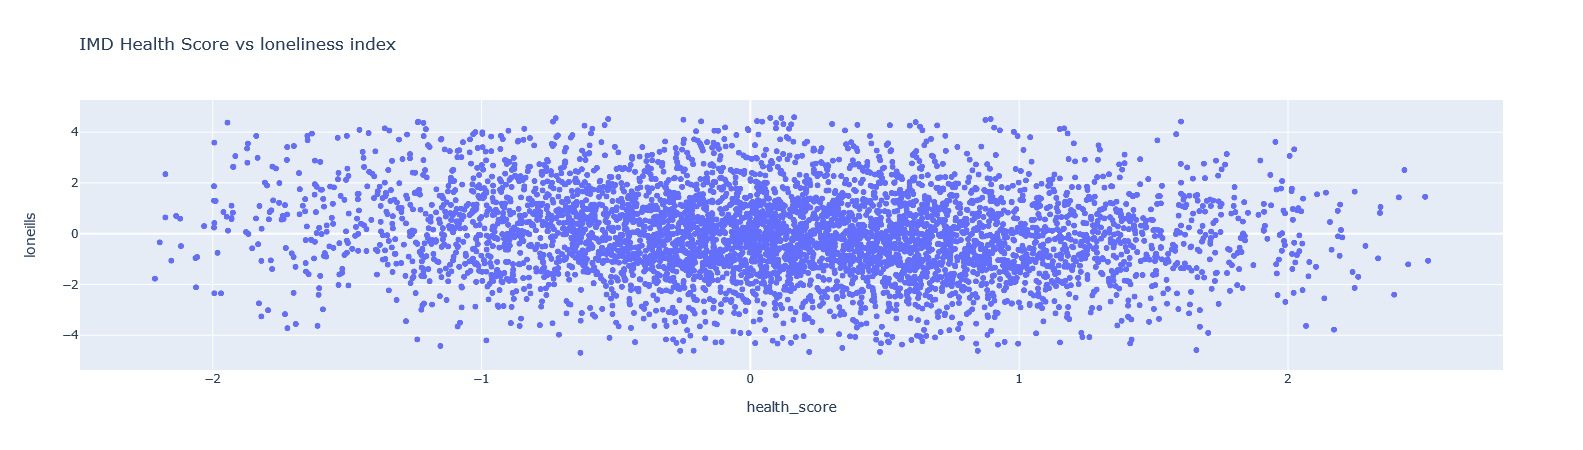

In [21]:
fig = px.scatter(loneliness_health, y='loneills', x='health_score', title='IMD Health Score vs loneliness index')
fig.show()
fig.write_image("england/health_loneills_scatter.png")

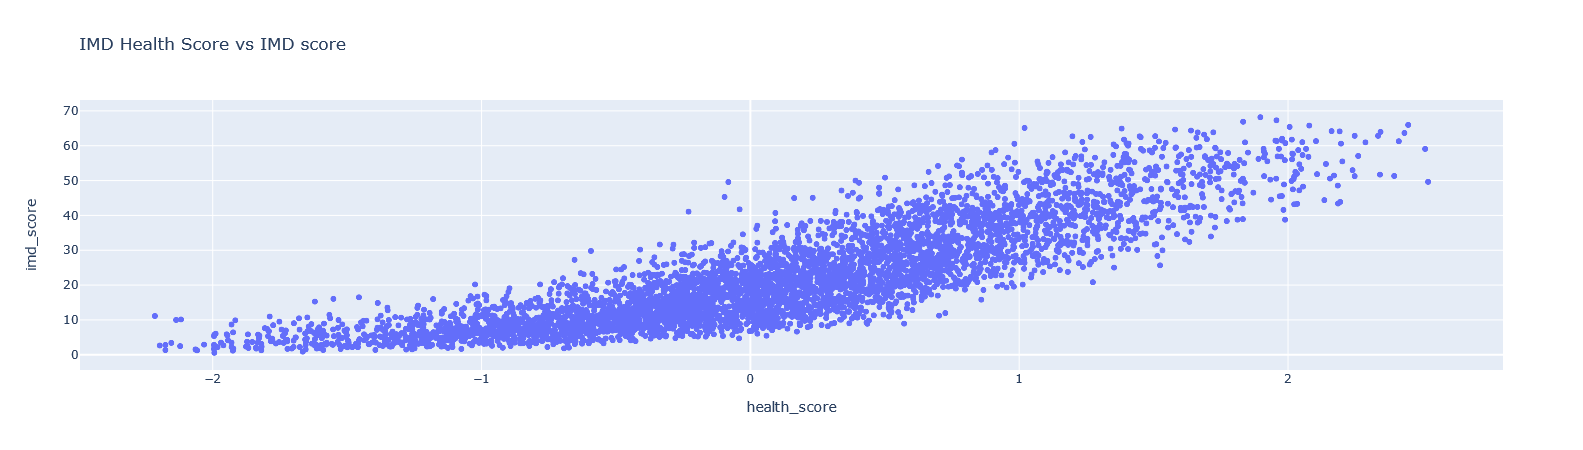

In [8]:
fig = px.scatter(loneliness_health, y='imd_score', x='health_score', title='IMD Health Score vs IMD score')
fig.show()

In [9]:
loneliness_health[['imd_score', 'health_score', 'loneills']].corr()

,imd_score,health_score,loneills
imd_score,1.000000,0.853146,-0.186879
health_score,0.853146,1.000000,-0.135923
loneills,-0.186879,-0.135923,1.000000


So the health deprivation score doesn't appear strongly correlated with loneliness but there's a fairly strong correlation between health and overall IMD score (unsurprising given IMD score is 13.5% of the IMD score).

This doesn't match the ONS findings based on data collected for the Community Life Survey (CLS) between August 2016 and March 2017: "People in poor health or who have conditions they describe as “limiting” were also at particular risk of feeling lonely more often." - https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/articles/lonelinesswhatcharacteristicsandcircumstancesareassociatedwithfeelinglonely/2018-04-10

## Health and loneliness deciles

Maybe the raw scores are too varied to show much relationship but perhaps there's a tendancy for worse health scores to the related to worse loneliness scores

In [10]:
loneliness_health['loneills_quintile'] = pd.qcut(loneliness_health['loneills'], 5, labels=False)+1.0
loneliness_health['health_quintile'] = ((loneliness_health['health_decile']/2)+0.01).round(0) # adding 0.01 as .5 getting rounded down

In [11]:
loneliness_health['loneills_decile'] = pd.qcut(loneliness_health['loneills'], 10, labels=False)+1.0

In [12]:
quintile_counts = loneliness_health.value_counts(subset=['loneills_quintile', 'health_quintile'])
quintile_counts = pd.DataFrame(quintile_counts.values, index=quintile_counts.index, columns=['count'])
quintile_counts.reset_index(inplace=True)
quintile_counts = quintile_counts.pivot(index='loneills_quintile', columns='health_quintile', values='count')

decile_counts = loneliness_health.value_counts(subset=['loneills_decile', 'health_decile'])
decile_counts = pd.DataFrame(decile_counts.values, index=decile_counts.index, columns=['count'])
decile_counts.reset_index(inplace=True)
decile_counts = decile_counts.pivot(index='loneills_decile', columns='health_decile', values='count')

In [13]:
loneliness_health['loneills_decile']

4       3.0
5       1.0
6       4.0
7       7.0
8       9.0
       ... 
6261    9.0
6262    8.0
6263    4.0
6265    4.0
6267    2.0
Name: loneills_decile, Length: 4943, dtype: float64

In [14]:
quintile_counts

health_quintile,1.0,2.0,3.0,4.0,5.0
loneills_quintile,,,,,
1.0,255,258,205,149,122
2.0,241,242,230,175,100
3.0,213,251,235,163,127
4.0,189,213,222,202,162
5.0,172,203,195,188,231


In [15]:
decile_counts

health_decile,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
loneills_decile,,,,,,,,,,
1.0,59,68,81,64,52,47,47,24,29,24
2.0,54,74,77,36,64,42,47,31,43,26
3.0,56,67,72,51,50,63,54,32,31,18
4.0,56,62,59,60,67,50,49,40,21,30
5.0,52,50,71,60,70,46,41,40,38,27
6.0,54,57,69,51,71,48,42,40,32,30
7.0,47,42,53,55,55,58,46,56,50,32
8.0,59,41,52,53,63,46,53,47,49,31
9.0,51,55,46,48,48,46,44,52,54,50


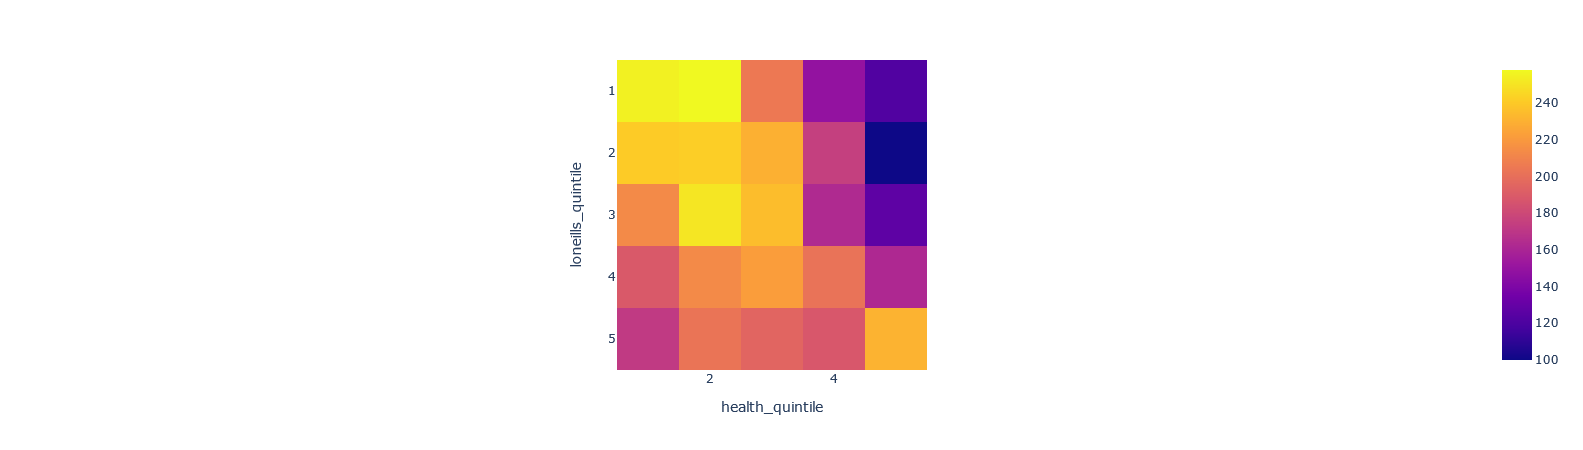

In [16]:
fig = px.imshow(quintile_counts)
fig.show()

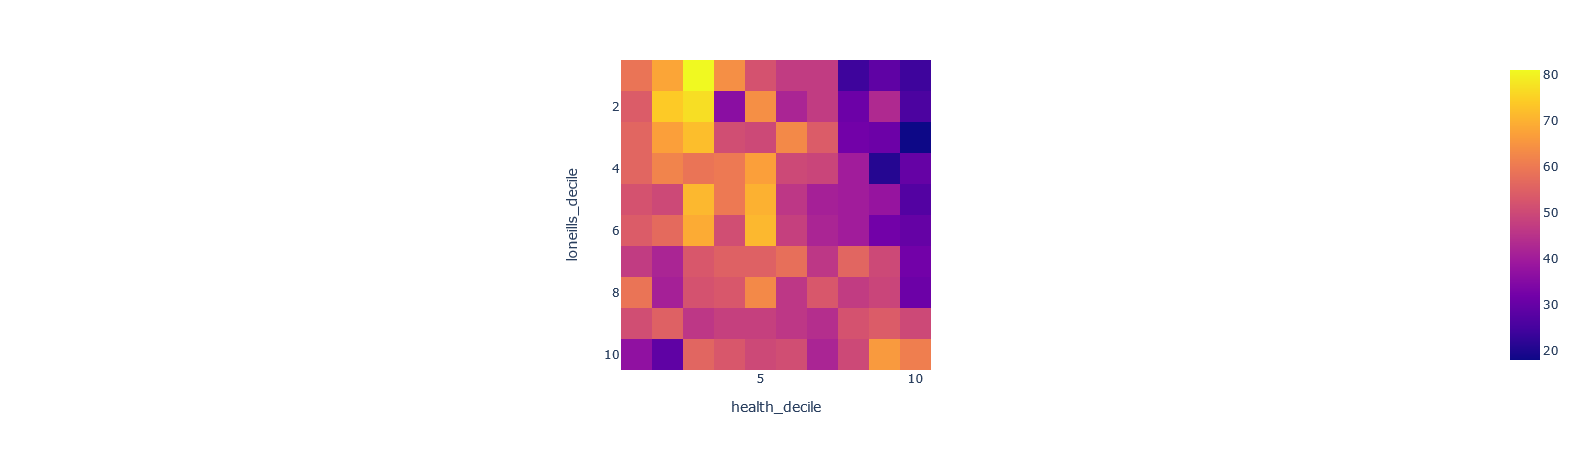

In [17]:
fig = px.imshow(decile_counts)
fig.show()
fig.write_image("england/health_loneills_deciles_heatmap.png")

There's definitely a bit of "hotspot" for lowest scoring loneills deciles and most deprived health deciles (and corresponding deadspot of few low scoring loneills deciles amongst the least deprived health deciles, particularly for health decile 10). But otherwise if seems fairly smudgy.

### NB Loneliness deciles go from 1 least lonely to 10 most lonely, while Health deciles go from 1 most deprived to 10 least deprived

So the above pots in the data would seem to be counter to what one might expect (worse health a factor in increased loneliness). Maybe lower health deprivation allows for access to prescriptions counted by the loneliness index (and vice versa, health deprivation prevents access to the prescriptions needed to be counted in the loneliness index).

## Simple linear models: loneills score from IMD domain scores

In [18]:
import sklearn
from sklearn import linear_model

In [19]:
reg = linear_model.LinearRegression()

X = loneliness_imd[['income_score', 'employment_score', 'education_score', 'health_score', 'crime_score', 'housing_score', 'living_score', 'poor_children_score', 'poor_older_score']]
y = loneliness_imd['loneills']

reg.fit(X, y)

reg.score(X, y)

0.0613421937939419

In [20]:
reg = linear_model.LinearRegression()

X = loneliness_imd[['income_score', 'employment_score', 'education_score', 'crime_score', 'housing_score', 'living_score', 'poor_children_score', 'poor_older_score']]
y = loneliness_imd['loneills']

reg.fit(X, y)

reg.score(X, y)

0.05871851703134756

So health score definitely helps with the fit but neither are great.